<a href="https://colab.research.google.com/github/Anuvir71/CognoRise/blob/main/EMPLOYEE_SALARIES_FOR_DIFFERENT_JOB_ROLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/ds_salaries.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [4]:
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.tail(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [11]:
df.duplicated().sum()

0

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

In [14]:
df.shape

(607, 12)

In [16]:
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [17]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Exploratory Data Analysis

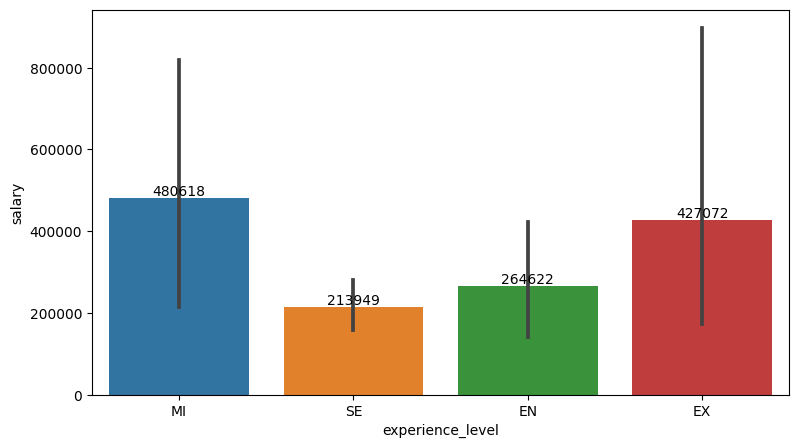

In [27]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x=df['experience_level'],y=df['salary'])
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

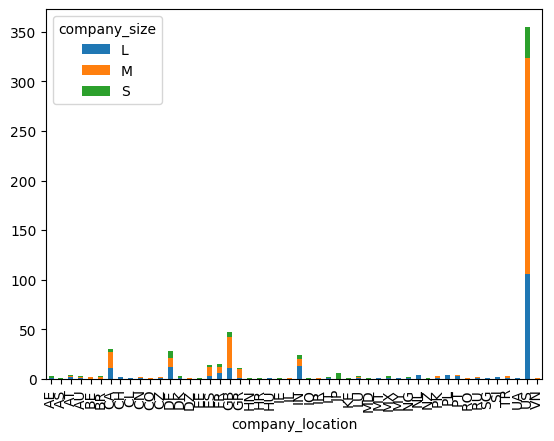

In [51]:
pd.crosstab(df['company_location'],df['company_size']).plot(kind='bar',stacked='True')
plt.xticks(rotation=90)
plt.show()

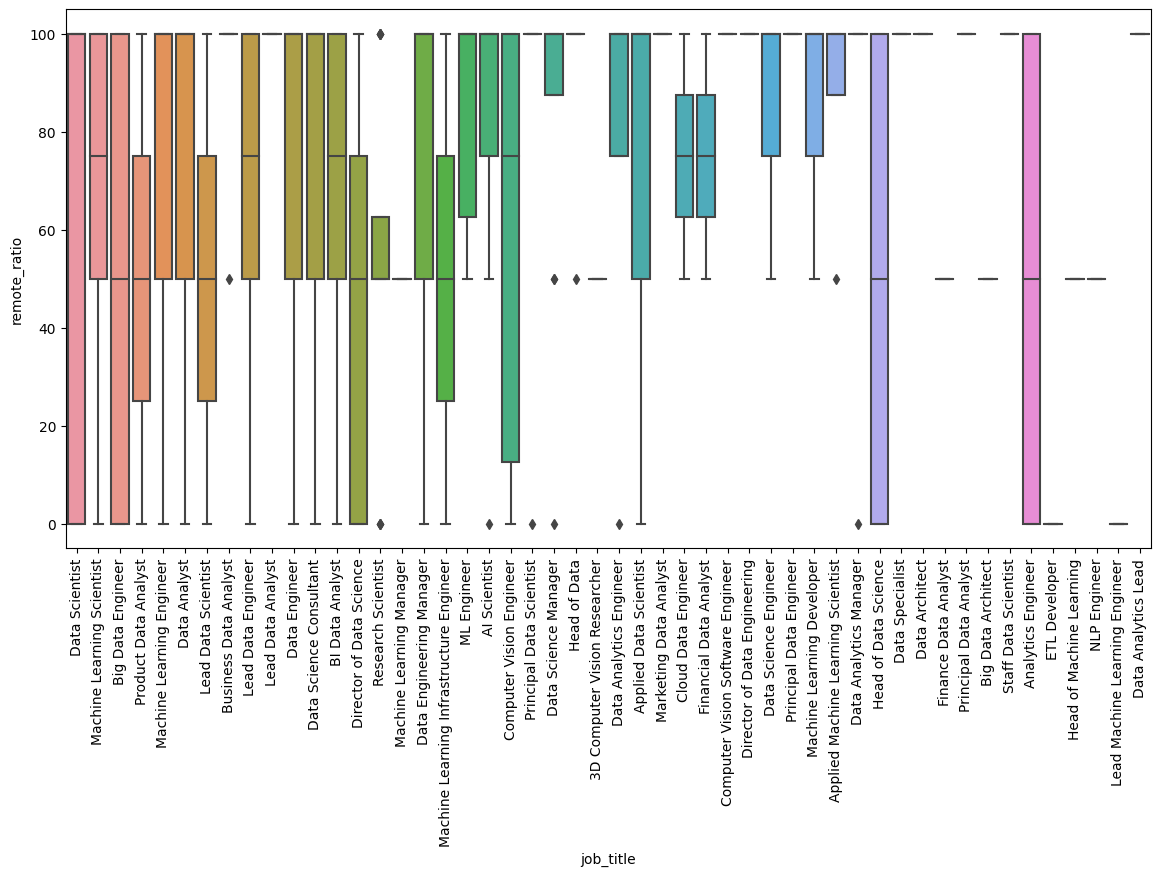

In [56]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df['job_title'],y=df['remote_ratio'])
plt.xticks(rotation=90)
plt.show()

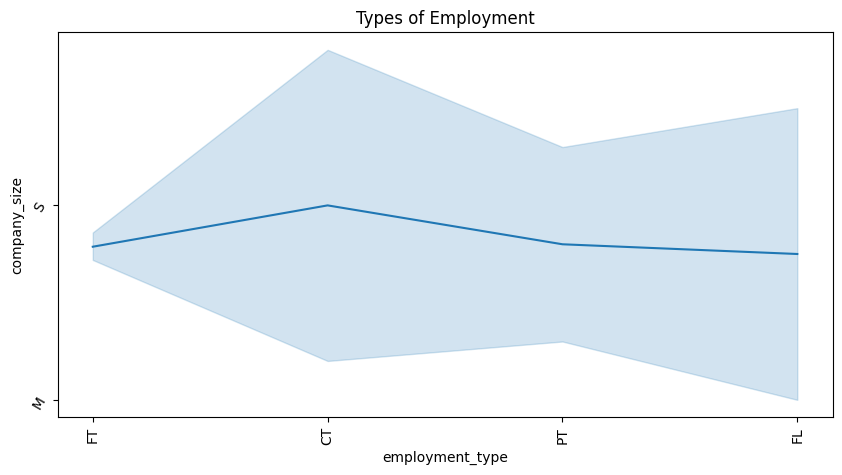

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['employment_type'],y=df['company_size'])
plt.xticks(rotation=90)
plt.yticks(rotation=60)
plt.title('Types of Employment')
plt.show()

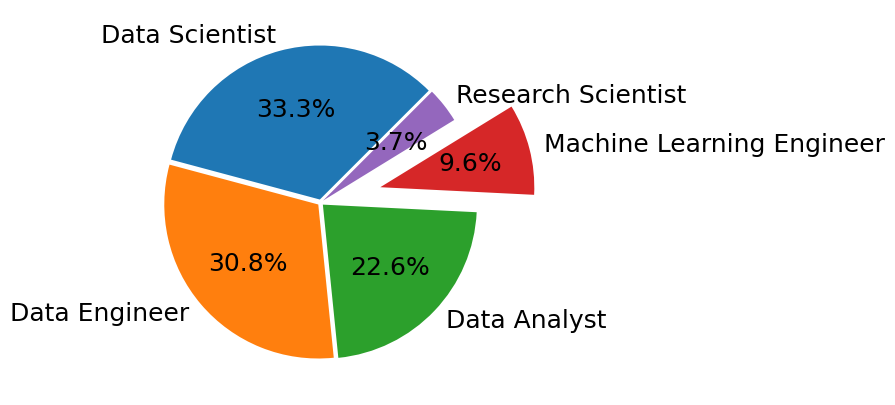

In [85]:
plt.figure(figsize=(5,5))
d=(df["job_title"].value_counts(normalize=True)*100).head()
keys=df["job_title"].value_counts().head().index
colorz = ['#B5DF00','#AD1FFF', '#FFC93F','#5FB1FF','#BF1B00']
exploda = (0.02, 0.02, 0.02, 0.4, 0.02)
plt.pie(d, labels = keys, autopct='%1.1f%%', explode=exploda, startangle=45,textprops={'fontsize': 18})
plt.savefig("audiencePie.png")

In [87]:
from wordcloud import WordCloud

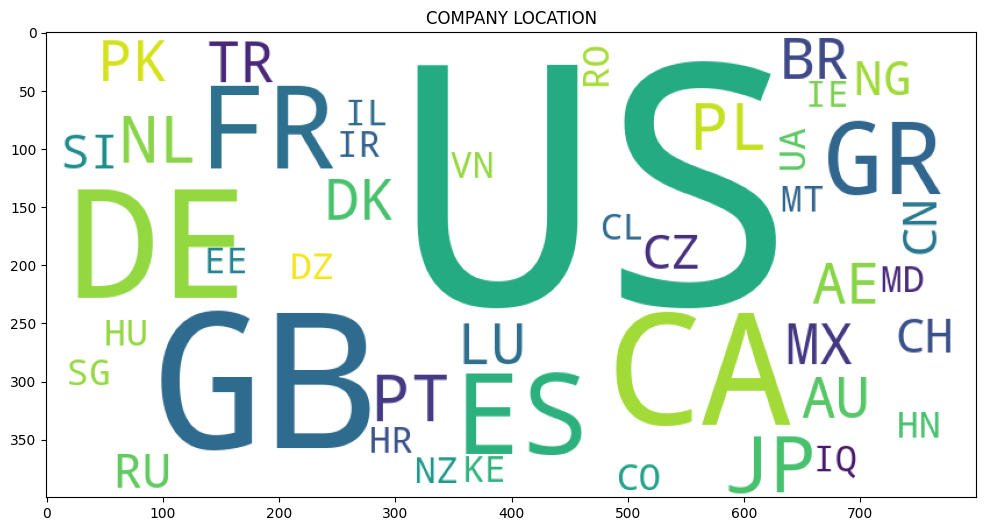

In [91]:
all_reviews = ' '.join(df['company_location'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color= 'white').generate(all_reviews)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.title('COMPANY LOCATION')
plt.show()

In [92]:
df.columns


Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

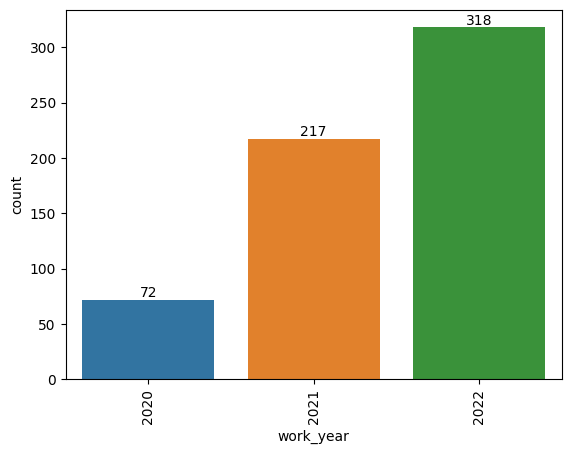

In [94]:
ax =sns.countplot(x=df['work_year'])
for bars in ax.containers:
  ax.bar_label(bars)
  plt.xticks(rotation=90)
  plt.show()